In [13]:
import numpy as np
import pandas as pd
import os 
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt   
from matplotlib.pyplot import cm

from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from pyDGSA.cluster import KMedoids


In [14]:
responses = np.random.rand(400,1)

(array([40., 47., 33., 54., 33., 52., 41., 32., 34., 34.]),
 array([0.01247939, 0.11089748, 0.20931557, 0.30773366, 0.40615174,
        0.50456983, 0.60298792, 0.70140601, 0.7998241 , 0.89824218,
        0.99666027]),
 <BarContainer object of 10 artists>)

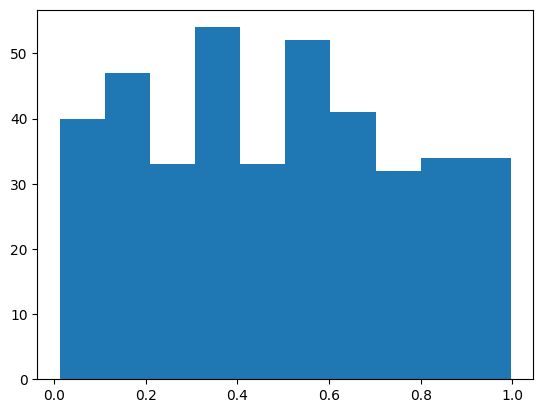

In [15]:
plt.hist(responses)

In [16]:

distances = pdist(responses, metric='euclidean')
distances = squareform(distances)

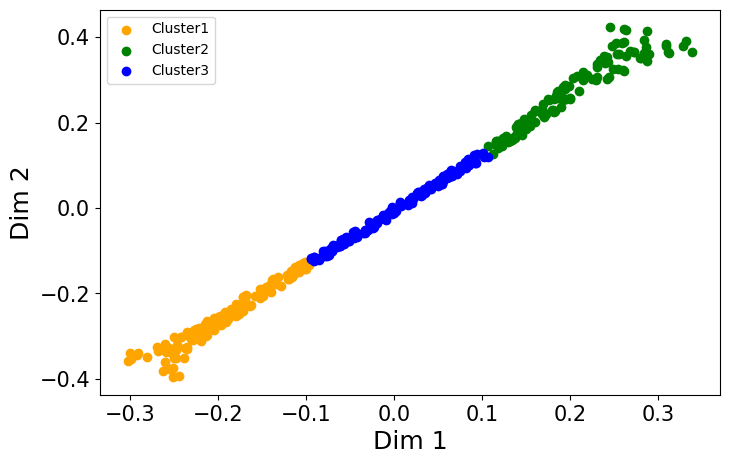

In [32]:
n_clusters = 3
cluster_colors = ['orange', 'green', 'blue', 'red', 'black']
cluster_names = [f'Cluster{i+1}' for i in range(n_clusters)]

clusterer = KMedoids(n_clusters=n_clusters, max_iter=4000, tol=1e-6)
labels, medoids = clusterer.fit_predict(distances)



mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress=False)
mds_dist = mds.fit_transform(distances)

fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')
x = mds_dist[:, 0]
y = mds_dist[:, 1]
for i in range(n_clusters):
    sc = ax.scatter(x[labels == i], y[labels == i],
                    c=cluster_colors[i], label=cluster_names[i])
ax.set(xlabel='Dim 1', ylabel='Dim 2')
ax.set_xlabel(xlabel='Dim 1', fontsize=18)
ax.set_ylabel(ylabel='Dim 2', fontsize=18)
ax.tick_params(axis='both', labelsize=15)
ax.legend()